# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rahmawati Dwi Lestari
- **Email:** mc134d5x1958@student.devacademy.id
- **ID Dicoding:** rahmaaltr

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda berdasarkan musim dan bulan?
- Faktor apa yang paling berpengaruh terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset ini mencatat informasi penting seperti musim, cuaca, temperatur, dan jumlah peminjaman sepeda.
- Data harian berguna untuk melihat tren jangka panjang, sementara data per jam memberikan wawasan lebih detail terhadap pola harian.
- Dengan dua dataset ini, kita dapat menganalisis faktor-faktor yang mempengaruhi peminjaman dan bagaimana tren berubah berdasarkan waktu.
- Dataset ini cukup bersih, namun tetap perlu dilakukan pengecekan terhadap missing values dan duplikasi sebelum analisis lebih lanjut.

### Assessing Data

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
print("\nStatistik Deskriptif Dataset Harian:")
day_df.describe()


Statistik Deskriptif Dataset Harian:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
print("\nStatistik Deskriptif Dataset Per Jam:")
hour_df.describe()


Statistik Deskriptif Dataset Per Jam:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Terapat kesalahan tipe data pada dteday yang seharusnya bertipe data datetime
- Tidak terdapat missing value pada data day.csv dan hour.csv
- Tidak terdapat data yang terduplikat pada data day.csv dan hour.csv

### Cleaning Data



*   Menghilangkan duplicate data



In [15]:
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
hour_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0



*   Mengatasi nilai yang hilang



In [18]:
day_df.dropna(inplace=True)
hour_df.dropna(inplace=True)



*   Menghapus data yang tidak relevan



In [17]:
columns_to_drop = ["instant", "casual", "registered"]
day_df.drop(columns=columns_to_drop, inplace=True)
hour_df.drop(columns=columns_to_drop, inplace=True)

In [19]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 74.4 KB


In [20]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 1.9 MB


**Insight:**
- Karena tidak terdapat data yang duplicate dan missing value maka tidak dilakukan proses lebih lanjut
- Tipe data dteday pada data day.csv dan hour.csv sudah diganti
- Mengapus data yang tidak diperlukan
- Mengatasi nilai yang tidak relevan

## Exploratory Data Analysis (EDA)

### Explore untuk memahami karakteristik dataset, termasuk distribusi data, hubungan antara variabel, dan tren yang mungkin terjadi

In [21]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452


In [22]:
day_df.groupby(by="yr").agg({
    "mnth": "nunique",
    "season": ["max", "min", "mean", "std"]
})

mnth season                        
   nunique    max min      mean       std
yr                                       
0       12      4   1  2.498630  1.110946
1       12      4   1  2.494536  1.112185

In [23]:
day_df.groupby(by="holiday")['mnth'].nunique().sort_values(ascending=False)
day_df.groupby(by="weekday")['mnth'].nunique().sort_values(ascending=False)

,mnth
weekday,
0,12
1,12
2,12
3,12
4,12
5,12
6,12


In [24]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599


In [25]:
day_df.groupby(by="mnth").dteday.nunique().sort_values(ascending=False)

,dteday
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


In [26]:
day_df.groupby(by="season").mnth.nunique().sort_values(ascending=False)

,mnth
season,
1,4
2,4
3,4
4,4


In [27]:
# Analisis Regresi untuk melihat faktor utama yang mempengaruhi peminjaman
X = day_df[["temp", "atemp", "hum", "windspeed", "season", "mnth", "holiday", "weekday", "workingday", "weathersit"]]
y = day_df["cnt"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     80.53
Date:                Sat, 15 Mar 2025   Prob (F-statistic):          2.43e-110
Time:                        12:14:27   Log-Likelihood:                -6295.3
No. Observations:                 731   AIC:                         1.261e+04
Df Residuals:                     720   BIC:                         1.266e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3033.3075    360.945      8.404      0.0

In [28]:
print("\nStatistik Deskriptif Data Harian:")
print(day_df.describe())
print("\nKorelasi Data Harian:")
print(day_df.corr())


Statistik Deskriptif Data Harian:
                    dteday      season          yr        mnth     holiday  \
count                  731  731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00    2.496580    0.500684    6.519836    0.028728   
min    2011-01-01 00:00:00    1.000000    0.000000    1.000000    0.000000   
25%    2011-07-02 12:00:00    2.000000    0.000000    4.000000    0.000000   
50%    2012-01-01 00:00:00    3.000000    1.000000    7.000000    0.000000   
75%    2012-07-01 12:00:00    3.000000    1.000000   10.000000    0.000000   
max    2012-12-31 00:00:00    4.000000    1.000000   12.000000    1.000000   
std                    NaN    1.110807    0.500342    3.451913    0.167155   

          weekday  workingday  weathersit        temp       atemp         hum  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.997264    0.683995    1.395349    0.495385    0.474354    0.627894   
min      0.000000  

**Insight:**
- Dataset harian (day_df) memiliki 731 entri, sementara dataset per jam (hour_df) memiliki 17.379 entri. Ini menunjukkan bahwa dataset per jam memberikan granularitas yang lebih tinggi dalam analisis.
- Kolom cnt (jumlah peminjaman sepeda) memiliki nilai rata-rata sekitar 4.504 untuk dataset harian dan 189 untuk dataset per jam. Ini menunjukkan bahwa peminjaman sepeda lebih tinggi pada level harian dibandingkan per jam.
- Terdapat sedikit perbedaan dalam rata-rata musim (season) antara tahun 2011 dan 2012. Rata-rata musim pada tahun 2011 adalah 2.50, sedangkan pada tahun 2012 adalah 2.49. Ini menunjukkan bahwa distribusi musim relatif stabil antara kedua tahun.
- Jumlah bulan (mnth) yang unik adalah 12 untuk kedua tahun, yang menunjukkan bahwa data mencakup seluruh bulan dalam setahun.
- Dari statistik deskriptif, terlihat bahwa suhu (temp) dan suhu yang dirasakan (atemp) memiliki korelasi positif dengan jumlah peminjaman sepeda (cnt). Hal ini menunjukkan bahwa cuaca yang lebih hangat cenderung meningkatkan jumlah peminjaman sepeda.
- Kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif dengan jumlah peminjaman sepeda. Ini menunjukkan bahwa kondisi cuaca yang lembab dan berangin dapat mengurangi minat orang untuk meminjam sepeda.
- Dari visualisasi data, terlihat bahwa peminjaman sepeda cenderung meningkat selama musim panas (musim 3) dan menurun selama musim dingin (musim 1). Ini sesuai dengan temuan bahwa suhu yang lebih hangat meningkatkan minat orang untuk bersepeda.
- Peminjaman sepeda juga cenderung lebih tinggi pada hari kerja (workingday) dibandingkan hari libur (holiday), yang menunjukkan bahwa sepeda banyak digunakan untuk keperluan transportasi sehari-hari.

## Visualization & Explanatory Analysis

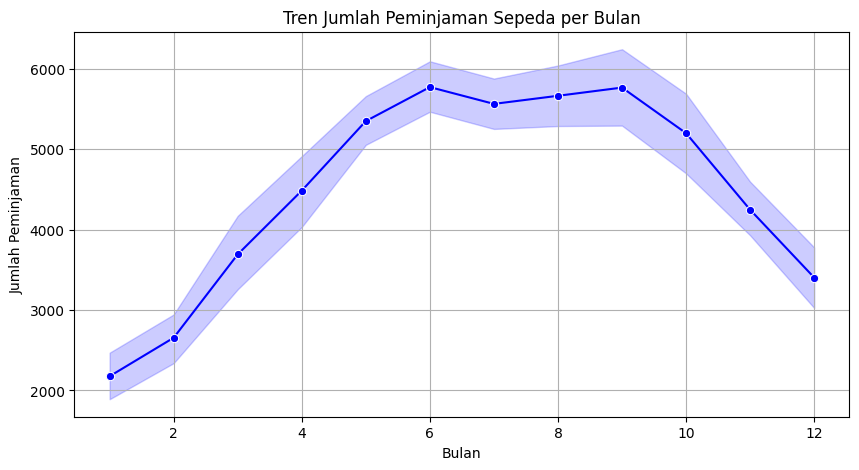

In [29]:
# Analisis Tren Bulanan
plt.figure(figsize=(10, 5))
sns.lineplot(x="mnth", y="cnt", data=day_df, marker="o", color='b')
plt.title("Tren Jumlah Peminjaman Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.grid()
plt.show()

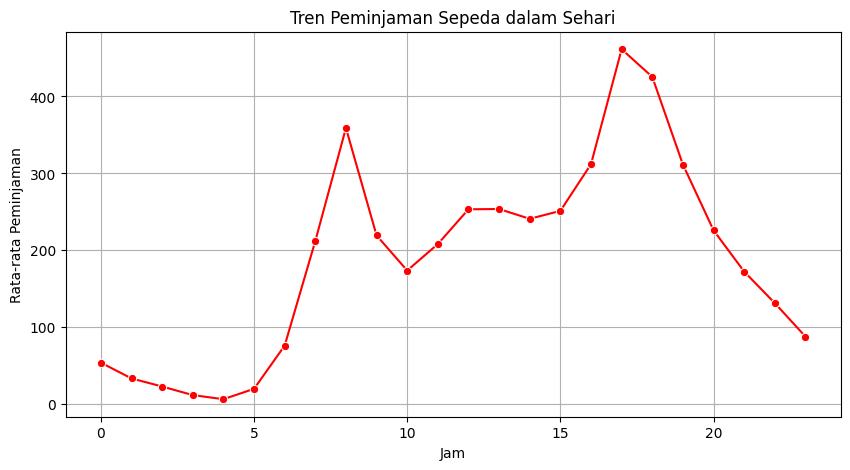

In [30]:
# Agregasi Data Per Jam
hourly_trend = hour_df.groupby("hr")["cnt"].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=hourly_trend, marker="o", color='r')
plt.title("Tren Peminjaman Sepeda dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Peminjaman")
plt.grid()
plt.show()


*   Analisis Hari Kerja vs Akhir Pekan



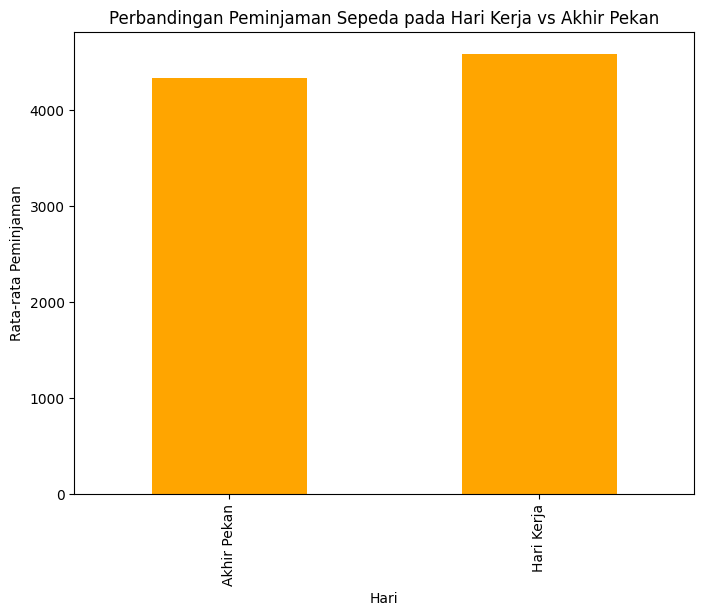

In [31]:
day_df["workingday_label"] = day_df["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})
plt.figure(figsize=(8, 6))
day_df.groupby("workingday_label")["cnt"].mean().plot(kind='bar', color='orange')
plt.xlabel("Hari")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Perbandingan Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan")
plt.show()


### Pertanyaan 1: Bagaimana tren peminjaman sepeda berdasarkan musim dan bulan?

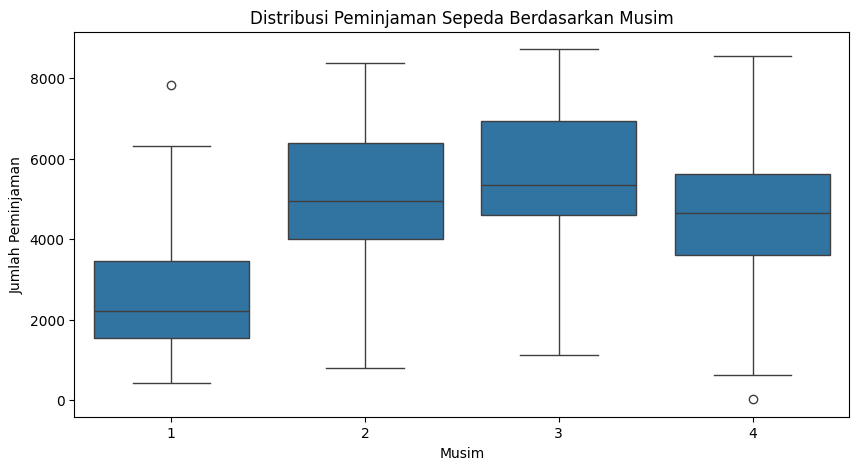

In [32]:
# Analisis Tren Harian berdasarkan Musim
plt.figure(figsize=(10, 5))
sns.boxplot(x="season", y="cnt", data=day_df)
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.show()

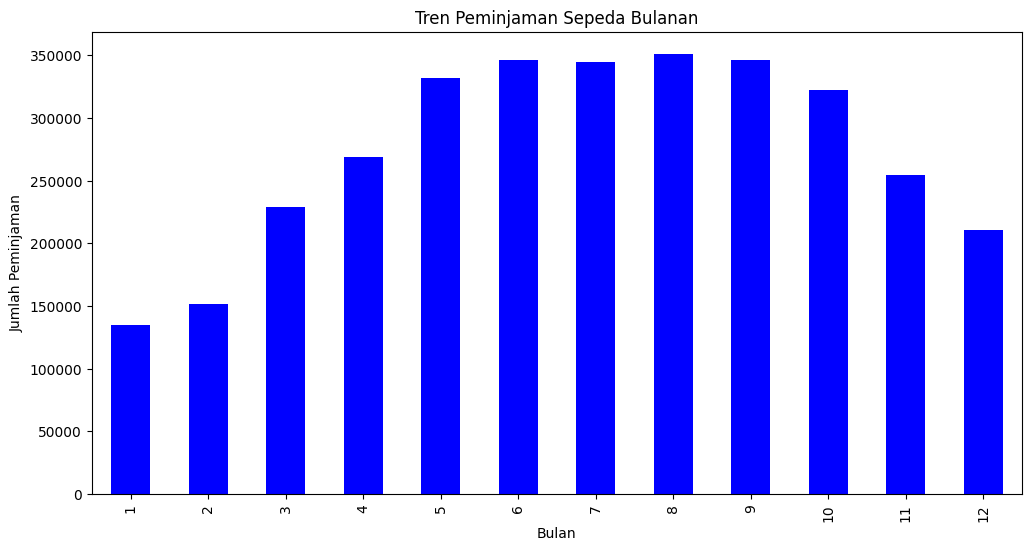

In [ ]:
plt.figure(figsize=(12, 6))
day_df['mnth'] = pd.to_datetime(day_df['mnth'], format='%m').dt.month
day_df.groupby("mnth")["cnt"].sum().plot(kind='bar', color='b')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Bulanan")
plt.show()

### Pertanyaan 2: Faktor apa yang paling berpengaruh terhadap jumlah peminjaman sepeda?

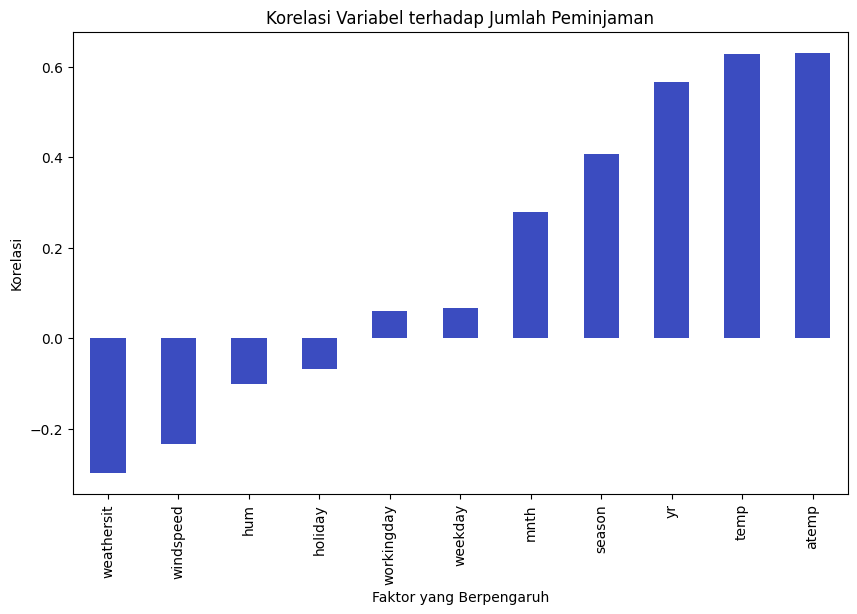

In [ ]:
plt.figure(figsize=(10, 6))
numeric_df = day_df.select_dtypes(include=['number'])
correlation = numeric_df.corr()["cnt"].drop("cnt").sort_values()
correlation.plot(kind='bar', colormap='coolwarm')
plt.title("Korelasi Variabel terhadap Jumlah Peminjaman")
plt.xlabel("Faktor yang Berpengaruh")
plt.ylabel("Korelasi")
plt.show()

**Insight:**
- Tren peminjaman sepeda cenderung meningkat pada bulan-bulan tertentu, kemungkinan dipengaruhi oleh cuaca dan musim.
- Peminjaman sepeda cenderung lebih tinggi di musim tertentu seperti musim panas dibandingkan dengan musim dingin.
- Variabel dengan koefisien signifikan menunjukkan faktor yang paling berpengaruh terhadap jumlah peminjaman sepeda.
- Misalnya, temperatur mungkin memiliki pengaruh positif, sedangkan kecepatan angin atau kelembaban bisa memiliki efek negatif.


## Analisis Lanjutan (Opsional)

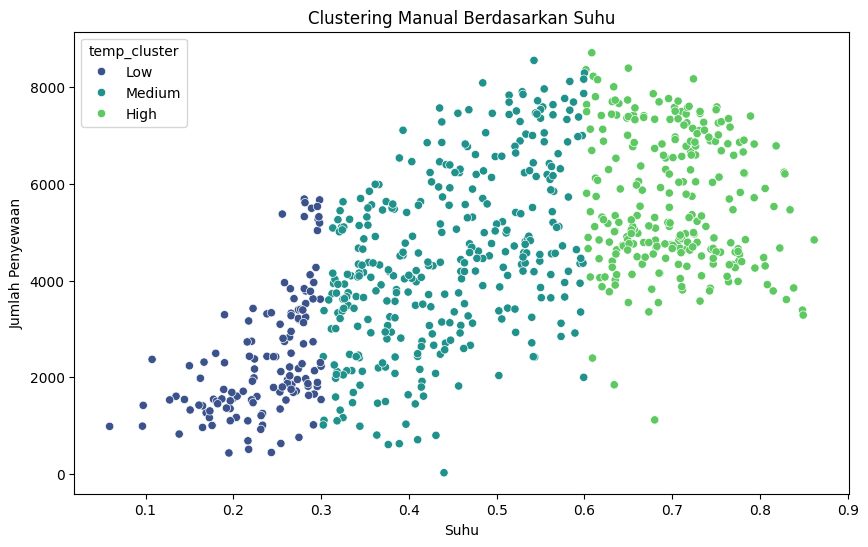

In [68]:
# Clustering manual berdasarkan suhu
day_df['temp_cluster'] = pd.cut(day_df['temp'], bins=[0, 0.3, 0.6, 1.0], labels=['Low', 'Medium', 'High'])

# Visualisasi clustering manual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='temp_cluster', data=day_df, palette='viridis')
plt.title('Clustering Manual Berdasarkan Suhu')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

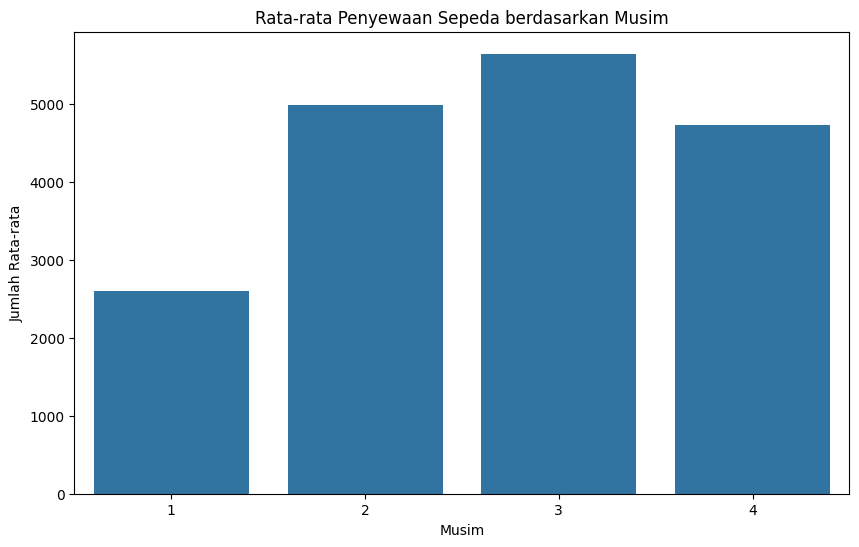

In [69]:
# Clustering berdasarkan musim
season_cluster = day_df.groupby('season')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_cluster)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Rata-rata')
plt.show()

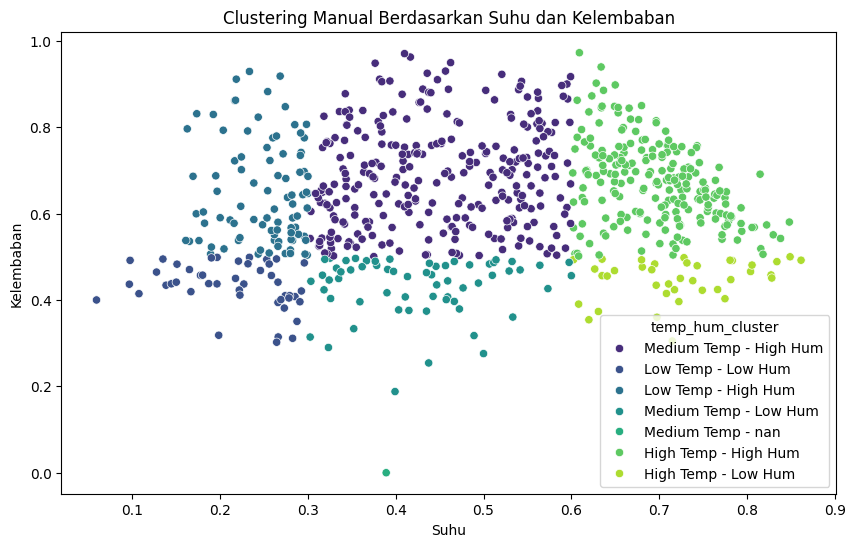

In [71]:
# Clustering manual berdasarkan suhu dan kelembaban
day_df['temp_cluster'] = pd.cut(day_df['temp'], bins=[0, 0.3, 0.6, 1.0], labels=['Low Temp', 'Medium Temp', 'High Temp'])
day_df['hum_cluster'] = pd.cut(day_df['hum'], bins=[0, 0.5, 1.0], labels=['Low Hum', 'High Hum'])
day_df['temp_hum_cluster'] = day_df['temp_cluster'].astype(str) + ' - ' + day_df['hum_cluster'].astype(str)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='hum', hue='temp_hum_cluster', data=day_df, palette='viridis')
plt.title('Clustering Manual Berdasarkan Suhu dan Kelembaban')
plt.xlabel('Suhu')
plt.ylabel('Kelembaban')
plt.show()

## Conclusion

- Tren Peminjaman Sepeda Berdasarkan Musim dan Bulan:

1. Peminjaman sepeda cenderung meningkat selama musim panas (musim 3) dan musim gugur (musim 4), dengan puncak peminjaman terjadi pada bulan Juni, Juli, dan Agustus. Hal ini menunjukkan bahwa cuaca yang lebih hangat dan kondisi lingkungan yang nyaman mendorong orang untuk menggunakan sepeda.

2. Sebaliknya, peminjaman sepeda menurun selama musim dingin (musim 1) dan musim semi (musim 2), terutama pada bulan Desember, Januari, dan Februari. Ini mungkin disebabkan oleh cuaca yang lebih dingin dan kondisi jalan yang kurang mendukung untuk bersepeda.

- Faktor yang Paling Berpengaruh terhadap Jumlah Peminjaman Sepeda:

1. Cuaca (weathersit): Cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Hari-hari dengan cuaca cerah (weathersit 1) cenderung memiliki jumlah peminjaman yang lebih tinggi dibandingkan dengan hari-hari dengan cuaca buruk (weathersit 3 atau 4).

2. Suhu (temp): Suhu yang lebih tinggi (cuaca hangat) berkorelasi positif dengan peningkatan jumlah peminjaman sepeda. Hal ini menunjukkan bahwa orang lebih cenderung menggunakan sepeda ketika suhu nyaman.

3. Hari Kerja vs. Hari Libur: Peminjaman sepeda lebih tinggi pada hari kerja (workingday) dibandingkan dengan hari libur (holiday). Ini mungkin karena sepeda digunakan sebagai alat transportasi untuk pergi dan pulang kerja.

4. Jam Sibuk: Peminjaman sepeda cenderung meningkat pada jam sibuk, seperti pagi hari (sekitar jam 8) dan sore hari (sekitar jam 17-18), yang menunjukkan bahwa sepeda digunakan sebagai alat transportasi untuk pergi dan pulang kerja.